<a href="https://colab.research.google.com/github/Malakk555/Data-Science-Project/blob/main/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install arabic-reshaper python-bidi
import arabic_reshaper
from bidi.algorithm import get_display
import numpy as np
import re


# BOE + Istitlaa


Load Primary Datasets (BOE + Istitlaa)

In [4]:


boe = pd.read_csv("boe_cleaned.csv", encoding="utf-8-sig")
istitlaa = pd.read_csv("istitlaa_cleaned.csv", encoding="utf-8-sig")


print("🔹 BOE Dataset:")
display(boe.head())

print("\n🔹 Istitlaa Dataset:")
display(istitlaa.head())


🔹 BOE Dataset:


,Section,Chapter,Article,Text,Status,Source
0,الباب الأول التعريفات والأحكام العامة,الفصل الأول التعريفات,المادة الأولى,يسمى هذا النظام نظام العمل.,عادية,https//laws.boe.gov.sa/boelaws/laws/lawdetails...
1,الباب الأول التعريفات والأحكام العامة,الفصل الأول التعريفات,المادة الثانية,- تعديل تعريف العامل وذلك بموجب المرسوم الملكي...,معدلة,https//laws.boe.gov.sa/boelaws/laws/lawdetails...
2,الباب الأول التعريفات والأحكام العامة,الفصل الأول التعريفات,المادة الثالثة,عُدلت هذه المادة بموجب المرسوم الملكي رقم (م /...,معدلة,https//laws.boe.gov.sa/boelaws/laws/lawdetails...
3,الباب الأول التعريفات والأحكام العامة,الفصل الأول التعريفات,المادة الرابعة,يجب على صاحب العمل والعامل عند تطبيق أحكام هذا...,عادية,https//laws.boe.gov.sa/boelaws/laws/lawdetails...
4,الباب الأول التعريفات والأحكام العامة,الفصل الأول التعريفات,المادة الخامسة,تم تعديل هذه المادة بموجب المرسوم الملكي رقم (...,معدلة,https//laws.boe.gov.sa/boelaws/laws/lawdetails...



🔹 Istitlaa Dataset:


,Article,Current Text,Proposed Text,URL
0,المادة 2,المادة (2) في تنفيذ أحكام الفقرة الفرعية (د) م...,حذف المادة ​,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
1,المادة 7,المادة (7) في تنفيذ أحكام المواد (الثانية والع...,المادة (7) في تنفيذ أحكام المواد (الثانية والع...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
2,المادة 10,المادة (10) في تنفيذ أحكام (المادة الثلاثون) م...,المادة (10) في تنفيذ أحكام (المادة الثلاثون) م...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
3,المادة 13,المادة (13) في تنفيذ أحكام (المادة التاسعة وال...,المادة (13) في تنفيذ أحكام (المادة التاسعة وال...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
4,المادة 15,المادة (15) في تنفيذ أحكام (المادة الثانية وال...,المادة (15) في تنفيذ أحكام (المادة الثانية وال...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...


 Overview of  BOE Dataset


In [5]:
print("🔹 BOE Dataset Info:")
boe.info()

print("\n🔹 Istitlaa Dataset Info:")
istitlaa.info()


🔹 BOE Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Section  248 non-null    object
 1   Chapter  248 non-null    object
 2   Article  248 non-null    object
 3   Text     248 non-null    object
 4   Status   248 non-null    object
 5   Source   248 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB

🔹 Istitlaa Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Article        16 non-null     object
 1   Current Text   16 non-null     object
 2   Proposed Text  16 non-null     object
 3   URL            16 non-null     object
dtypes: object(4)
memory usage: 644.0+ bytes


Status Distribution in BOE


/tmp/ipython-input-4054194997.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues")


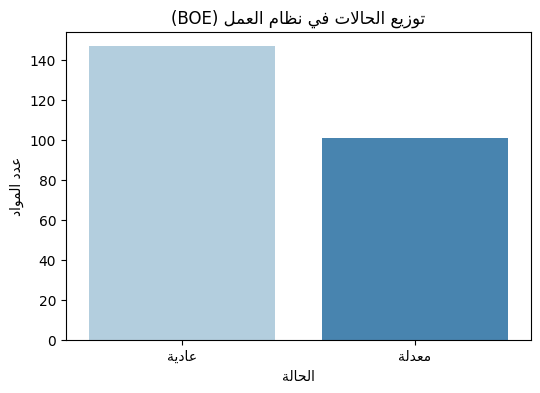

In [6]:


def fix_arabic(text):
    return get_display(arabic_reshaper.reshape(text))


boe['Status_fixed'] = boe['Status'].apply(fix_arabic)


status_counts = boe['Status_fixed'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues")
plt.title(fix_arabic("توزيع الحالات في نظام العمل (BOE)"))
plt.xlabel(fix_arabic("الحالة"))
plt.ylabel(fix_arabic("عدد المواد"))
plt.show()



The plot displays the count of article statuses in the BOE dataset, showing that regular (عادية) articles are more frequent than amended (معدلة) ones

 the most frequent sections in the BOE Labor Law.

🔹 Number of Articles per Section:
Section
الباب الخامس علاقات العمل                                                                                            39
الباب السادس شروط العمل وظروفه                                                                                       30
الباب الثامن الوقاية من مخاطر العمل والوقاية من الحوادث الصناعية الكبرى وإصابات العمل والخدمات الصحية والاجتماعية    28
الباب الأول التعريفات والأحكام العامة                                                                                21
الباب الرابع عشر هيئات تسوية الخلافات العمالية                                                                       19
الباب الحادي عشر عقد العمل البحري                                                                                    17
الباب الخامس عشر العقوبات                                                                                            17
الباب الثالث عشر تفتيش العمل                                                                                         1

/tmp/ipython-input-4049118682.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=section_counts_fixed.index, x=section_counts_fixed.values, palette="Greens")


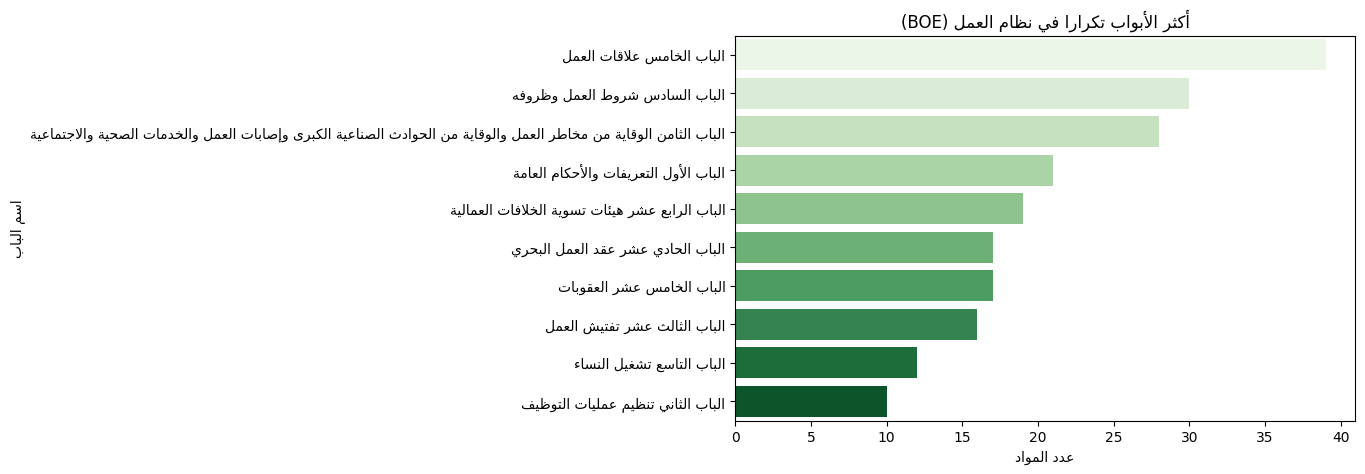

In [7]:
section_counts = boe['Section'].value_counts()

print("🔹 Number of Articles per Section:")
print(section_counts.head(10))


boe['Section_fixed'] = boe['Section'].apply(fix_arabic)
section_counts_fixed = boe['Section_fixed'].value_counts().head(10)


plt.figure(figsize=(8,5))
sns.barplot(y=section_counts_fixed.index, x=section_counts_fixed.values, palette="Greens")
plt.title(fix_arabic("أكثر الأبواب تكرارًا في نظام العمل (BOE)"))
plt.xlabel(fix_arabic("عدد المواد"))
plt.ylabel(fix_arabic("اسم الباب"))
plt.show()



الباب الخامس (علاقات العمل) contains the largest number of articles, followed by الباب السادس (شروط العمل وظروفه) and الباب الثامن (الوقاية من مخاطر العمل), indicating that these areas are the most elaborated within the labor law.


Relationship Between Section and Article Status (BOE)

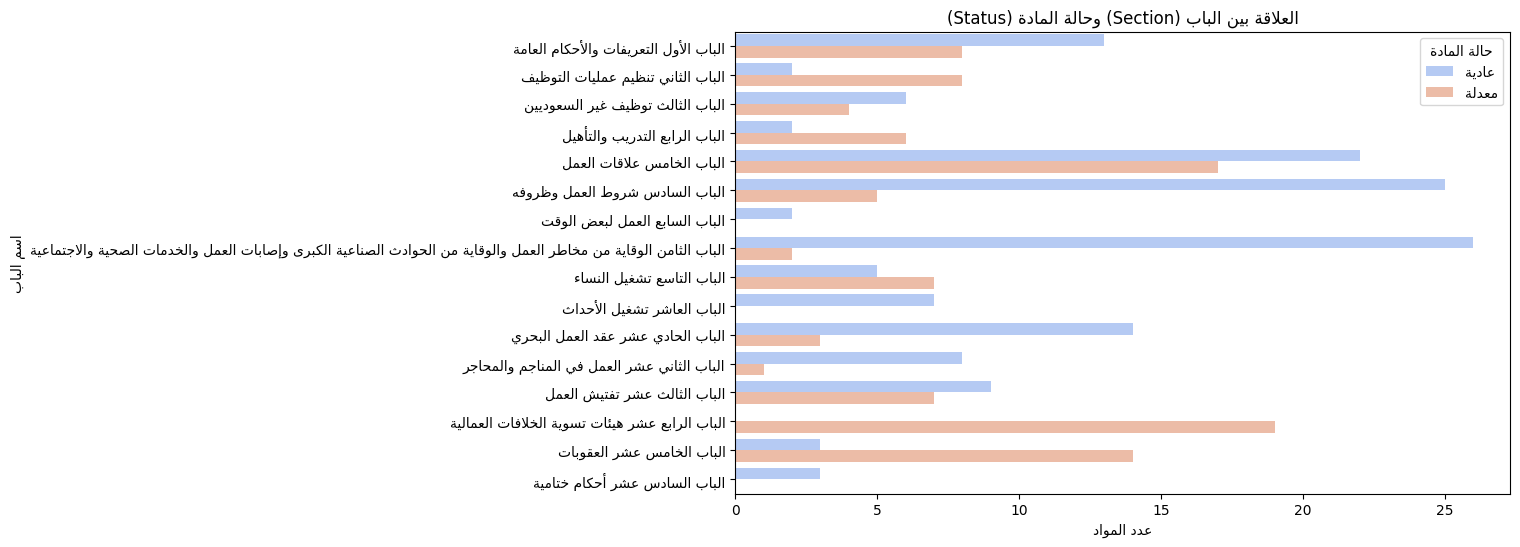

In [8]:

boe['Status_fixed'] = boe['Status'].apply(fix_arabic)
boe['Section_fixed'] = boe['Section'].apply(fix_arabic)

plt.figure(figsize=(10,6))
sns.countplot(data=boe, y='Section_fixed', hue='Status_fixed', palette='coolwarm')

plt.title(fix_arabic("العلاقة بين الباب (Section) وحالة المادة (Status)"))
plt.xlabel(fix_arabic("عدد المواد"))
plt.ylabel(fix_arabic("اسم الباب"))
plt.legend(title=fix_arabic("حالة المادة"))
plt.show()


The chart compares article statuses (عادية vs معدّلة) across different sections of the BOE Labor Law.
It shows that most sections contain a higher number of regular articles, though some — such as الباب الرابع عشر and الباب الخامس عشر — include a larger portion of amended articles.


# EDA Summary

The BOE dataset includes the full text of the Saudi Labor Law.
Analysis focused on the number of articles per section, legal status (active, amended, repealed),
and correlations between section and status using bar charts and counts.


# Metadata Review

The dataset was obtained from *BOE.gov.sa*, the official Saudi Bureau of Experts platform.
It represents the legally binding version of the Saudi Labor Law as issued by the Council of Ministers.


# Bias Awareness

As an official legal text, the dataset is unbiased.
However, differences may appear when compared to simplified or user-generated sources.



# Istitlaa



Overview of Istitlaa Dataset

In [9]:

display(istitlaa.head())


print("Shape:", istitlaa.shape)


istitlaa.info()


,Article,Current Text,Proposed Text,URL
0,المادة 2,المادة (2) في تنفيذ أحكام الفقرة الفرعية (د) م...,حذف المادة ​,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
1,المادة 7,المادة (7) في تنفيذ أحكام المواد (الثانية والع...,المادة (7) في تنفيذ أحكام المواد (الثانية والع...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
2,المادة 10,المادة (10) في تنفيذ أحكام (المادة الثلاثون) م...,المادة (10) في تنفيذ أحكام (المادة الثلاثون) م...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
3,المادة 13,المادة (13) في تنفيذ أحكام (المادة التاسعة وال...,المادة (13) في تنفيذ أحكام (المادة التاسعة وال...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
4,المادة 15,المادة (15) في تنفيذ أحكام (المادة الثانية وال...,المادة (15) في تنفيذ أحكام (المادة الثانية وال...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...


Shape: (16, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Article        16 non-null     object
 1   Current Text   16 non-null     object
 2   Proposed Text  16 non-null     object
 3   URL            16 non-null     object
dtypes: object(4)
memory usage: 644.0+ bytes


Article Proposal Frequency in Istitlaa

/tmp/ipython-input-4042809814.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=article_counts_fixed.index, x=article_counts_fixed.values, palette="Purples")


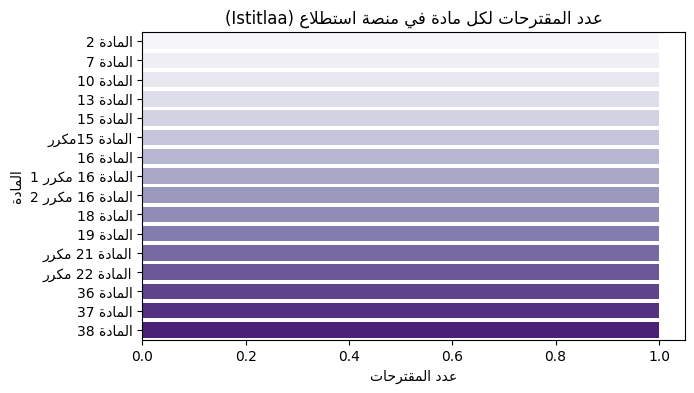

In [10]:


def fix_arabic(text):
    return get_display(arabic_reshaper.reshape(text))

istitlaa['Article_fixed'] = istitlaa['Article'].apply(fix_arabic)


article_counts_fixed = istitlaa['Article_fixed'].value_counts()

plt.figure(figsize=(7,4))
sns.barplot(y=article_counts_fixed.index, x=article_counts_fixed.values, palette="Purples")
plt.title(fix_arabic("عدد المقترحات لكل مادة في منصة استطلاع (Istitlaa)"))
plt.xlabel(fix_arabic("عدد المقترحات"))
plt.ylabel(fix_arabic("المادة"))
plt.show()



Categorize Proposed Changes in Istitlaa

In [11]:


def classify_change(row):
    current = str(row['Current Text']).strip()
    proposed = str(row['Proposed Text']).strip()

    if "حذف" in proposed or proposed == "" or proposed == "N/A":
        return "حذف المادة"
    elif current == proposed:
        return "بدون تعديل"
    else:
        return "تعديل أو استبدال النص"

istitlaa['Change_Type'] = istitlaa.apply(classify_change, axis=1)


istitlaa[['Article', 'Change_Type']].head()


,Article,Change_Type
0,المادة 2,حذف المادة
1,المادة 7,تعديل أو استبدال النص
2,المادة 10,تعديل أو استبدال النص
3,المادة 13,تعديل أو استبدال النص
4,المادة 15,تعديل أو استبدال النص


Distribution of Change Types in Istitlaa

/tmp/ipython-input-2379689035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=change_counts.index.map(fix_arabic), y=change_counts.values, palette="coolwarm")


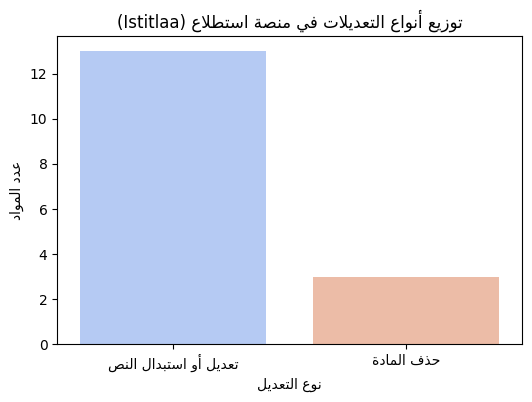

In [12]:

change_counts = istitlaa['Change_Type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=change_counts.index.map(fix_arabic), y=change_counts.values, palette="coolwarm")
plt.title(fix_arabic("توزيع أنواع التعديلات في منصة استطلاع (Istitlaa)"))
plt.xlabel(fix_arabic("نوع التعديل"))
plt.ylabel(fix_arabic("عدد المواد"))
plt.show()




The chart shows the breakdown of proposed amendments in the Istitlaa dataset.
Most proposals involve editing or replacing existing text, while a smaller portion suggests deleting entire articles.

# EDA Summary

The Istitlaa dataset includes public feedback on proposed amendments to the labor law.
The analysis categorized proposal types (addition, deletion, modification),
counted suggestions per article, and compared overlapping article numbers with BOE data.


# Metadata Review

Collected from *Istitlaa.sa*, the official Saudi public consultation platform.
The data represents proposals submitted by individuals and organizations.


# Bias Awareness

The data reflects individual opinions and suggestions,
so it may not represent legal or expert consensus.



Compare Between BOE and Istitlaa

In [13]:


boe_stats = {
    "Dataset": "BOE (Official Law)",
    "Rows": len(boe),
    "Avg_Text_Length": round(boe["Text"].astype(str).apply(len).mean(), 2),
    "Median_Text_Length": round(boe["Text"].astype(str).apply(len).median(), 2),
    "Unique_Articles": boe["Article"].nunique()
}

istitlaa_stats = {
    "Dataset": "Istitlaa (Public Consultation)",
    "Rows": len(istitlaa),
    "Avg_Text_Length": round(istitlaa["Proposed Text"].astype(str).apply(len).mean(), 2),
    "Median_Text_Length": round(istitlaa["Proposed Text"].astype(str).apply(len).median(), 2),
    "Unique_Articles": istitlaa["Article"].nunique()
}

metrics_df = pd.DataFrame([boe_stats, istitlaa_stats])

print("=== Summary Statistics Comparison: BOE vs Istitlaa ===")
display(metrics_df)

print("\nInterpretation:")
print("- BOE texts are generally longer, reflecting detailed legislative content.")
print("- Istitlaa proposals are shorter, since they focus on specific public amendments.")
print("- This difference highlights how public consultations simplify or target key legal articles.")


=== Summary Statistics Comparison: BOE vs Istitlaa ===


,Dataset,Rows,Avg_Text_Length,Median_Text_Length,Unique_Articles
0,BOE (Official Law),248,426.79,293.0,248
1,Istitlaa (Public Consultation),16,522.44,300.0,16



Interpretation:
- BOE texts are generally longer, reflecting detailed legislative content.
- Istitlaa proposals are shorter, since they focus on specific public amendments.
- This difference highlights how public consultations simplify or target key legal articles.


In [14]:
def get_article_num(text):
    if not isinstance(text, str):
        return None

    num = re.search(r'\d+', text)
    if num:
        return int(num.group())

    words = {
        "الثانية": 2, "الثالثة": 3, "الرابعة": 4, "الخامسة": 5,
        "السادسة": 6, "السابعة": 7, "الثامنة": 8, "التاسعة": 9,
        "العاشرة": 10, "الحادية عشرة": 11, "الثانية عشرة": 12,
        "الثالثة عشرة": 13, "الرابعة عشرة": 14, "الخامسة عشرة": 15,
        "السادسة عشرة": 16, "السابعة عشرة": 17, "الثامنة عشرة": 18,
        "التاسعة عشرة": 19, "العشرون": 20
    }
    for w, n in words.items():
        if w in text:
            return n
    return None

# تطبيق الدالة على العمودين
boe['Article_num'] = boe['Article'].apply(get_article_num)
istitlaa['Article_num'] = istitlaa['Article'].apply(get_article_num)

# المقارنة بين المواد المعدلة والمقترحة
common_nums = set(boe.loc[boe['Status']=='معدلة', 'Article_num'].dropna()) & set(istitlaa['Article_num'].dropna())

print("🔹 المواد المشتركة بين المعدّل (BOE) والمقترَح (Istitlaa):", sorted(common_nums))
print("🔸 عدد المواد المشتركة:", len(common_nums))

🔹 المواد المشتركة بين المعدّل (BOE) والمقترَح (Istitlaa): [2.0, 7.0, 10.0]
🔸 عدد المواد المشتركة: 3


#Secondary Datasets (Qiwa + FAQ)

In [15]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Load Secondary Datasets (Qiwa + FAQ)

In [16]:



faq_path = "labor_law_faq_cleaned.csv"
qiwa_path = "qiwa_data_cleaned.csv"

def smart_read(path):
    encodings = ["utf-8", "utf-8-sig", "cp1256", "iso-8859-6", "cp1252"]
    for enc in encodings:
        try:
            df = pd.read_csv(path, encoding=enc)
            print(f" Loaded {path} with encoding:", enc)
            return df
        except Exception as e:
            continue
    raise ValueError(f" Could not read file: {path}")


faq_df = smart_read(faq_path)
qiwa_df = smart_read(qiwa_path)

print("\nFAQ shape:", faq_df.shape)
print("Qiwa shape:", qiwa_df.shape)
faq_df.head(3)


 Loaded labor_law_faq_cleaned.csv with encoding: utf-8
 Loaded qiwa_data_cleaned.csv with encoding: utf-8

FAQ shape: (16, 2)
Qiwa shape: (16, 2)


,Question,Answer
0,هل يجب أن يكون عقد الموظف غير السعودي مكتوب با...,نعم، يجب أن يكتب باللغة العربية ولا يمنع إضافة...
1,لدى منشأة عليها إعفاء من المقابل المالي وأريد ...,لا ينتقل الإعفاء من المقابل المالي في حال نقل ...
2,هل يجب على صاحب العمل توفير لائحة تنظيمية معتم...,نعـم على صاحب العمل إطلاع الموظفين على لائحة ت...


##Quick Inspection


In [17]:

def quick_inspect(df, name="df"):
    print(f"=== {name} ===")
    print("Shape:", df.shape)
    print("\nColumns:")
    print(list(df.columns))
    print("\nData types:")
    print(df.dtypes)
    print("\nMissing values per column:")
    print(df.isna().sum().sort_values(ascending=False))
    print("\nApprox. duplicate rows:", df.duplicated().sum())


quick_inspect(faq_df, "FAQ (Labor Law FAQ)")
print("\n" + "-"*60 + "\n")
quick_inspect(qiwa_df, "Qiwa (Cleaned)")


=== FAQ (Labor Law FAQ) ===
Shape: (16, 2)

Columns:
['Question', 'Answer']

Data types:
Question    object
Answer      object
dtype: object

Missing values per column:
Question    0
Answer      0
dtype: int64

Approx. duplicate rows: 0

------------------------------------------------------------

=== Qiwa (Cleaned) ===
Shape: (16, 2)

Columns:
['URL', 'Content']

Data types:
URL        object
Content    object
dtype: object

Missing values per column:
URL        0
Content    0
dtype: int64

Approx. duplicate rows: 0


This function prints a concise overview of each dataset — shape, column names, data types, missing values, and duplicate counts. It helps you understand data quality before deeper EDA.

##Qiwa Articles

In [18]:


print("Columns:", qiwa_df.columns.tolist())
print("Number of rows:", len(qiwa_df))
print("\nSample rows:")
print(qiwa_df.head(3))


Columns: ['URL', 'Content']
Number of rows: 16

Sample rows:
                                                 URL  \
0  https://qiwa.sa/ar/labor-law/contracts/commiss...   
1  https://qiwa.sa/ar/labor-law/contracts/conclud...   
2  https://qiwa.sa/ar/labor-law/contracts/definit...   

                                             Content  
0  الباب الثالث عشر: هيئات تسوية الخلافات العمالي...  
1  المادة الثالثة والأربعون بعد المائتين:\nيصدر ا...  
2  الفصل الأول:التعريفات\nالمادة الأولى:\nيسمى هذ...  




Content Length Distribution

 الأعمدة بعد التنظيف:
['url', 'content']
 أول 5 قيم من content_length:
0      121
1     1238
2    24747
3     8209
4     9671
Name: content_length, dtype: int64


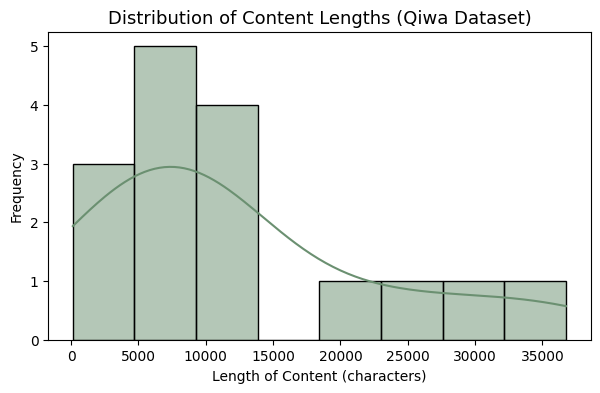

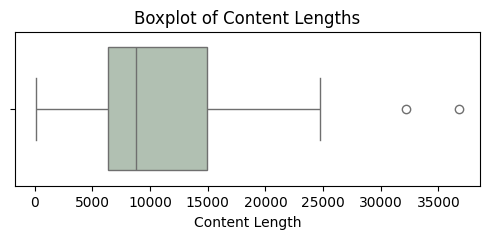

In [19]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


qiwa_df.columns = (
    qiwa_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

print(" الأعمدة بعد التنظيف:")
print(qiwa_df.columns.tolist())


if 'content_length' not in qiwa_df.columns:
    text_col = None
    for cand in ['content', 'text', 'body', 'article', 'content_text']:
        if cand in qiwa_df.columns:
            text_col = cand
            break

    if text_col is None:
        raise ValueError(" ما لقيت عمود نص مناسب (content/text/body/article) في qiwa_df.")

    qiwa_df['content_length'] = qiwa_df[text_col].astype(str).str.len()


print(" أول 5 قيم من content_length:")
print(qiwa_df['content_length'].head())

plt.figure(figsize=(7,4))
sns.histplot(qiwa_df["content_length"], bins=8, kde=True, color="#6B9071")
plt.title("Distribution of Content Lengths (Qiwa Dataset)", fontsize=13)
plt.xlabel("Length of Content (characters)")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(6,2))
sns.boxplot(x=qiwa_df["content_length"], color="#AEC3B0")
plt.title("Boxplot of Content Lengths", fontsize=12)
plt.xlabel("Content Length")
plt.show()


The plots illustrate the distribution of content lengths within the Qiwa dataset. The histogram shows that most texts range between 5,000 and 15,000 characters, with fewer very long entries beyond that. The density curve reveals a right-skewed distribution, meaning there are some exceptionally long documents.
The boxplot further confirms the presence of outliers, representing lengthy legal sections, while the majority of texts fall within the normal mid-range

Top Frequent Words (After Cleaning)

In [20]:
from collections import Counter
import re


def normalize_ar(text):
    text = re.sub(r"[ًٌٍَُِّْـ]", "", str(text))
    text = re.sub(r"[إأآا]", "ا", text)
    text = re.sub(r"ى", "ي", text)
    text = re.sub(r"ؤ", "و", text)
    text = re.sub(r"ئ", "ي", text)
    text = re.sub(r"[^ء-ي\s]", "", text)
    return text

stopwords = ["من","في","على","الى","عن","ما","لم","لن","لا","هو","هي","أن","إن","كان","وقد","فقد"]

tokens = []
for c in qiwa_df["content"].astype(str):
    clean = normalize_ar(c)
    words = [w for w in clean.split() if len(w) > 2 and w not in stopwords]
    tokens.extend(words)

freq = Counter(tokens)
top_words = freq.most_common(10)

print("Top 10 frequent Arabic words (Qiwa):")
for w, c in top_words:
    print(f"{w}: {c}")

Top 10 frequent Arabic words (Qiwa):
العمل: 1018
المادة: 747
علي: 587
بعد: 470
العامل: 358
صاحب: 353
الماية: 312
التي: 272
اذا: 257
هذا: 222


Visualization (Bar Chart)

/tmp/ipython-input-1831870563.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reshaped_words, y=counts, palette="Greens_r")


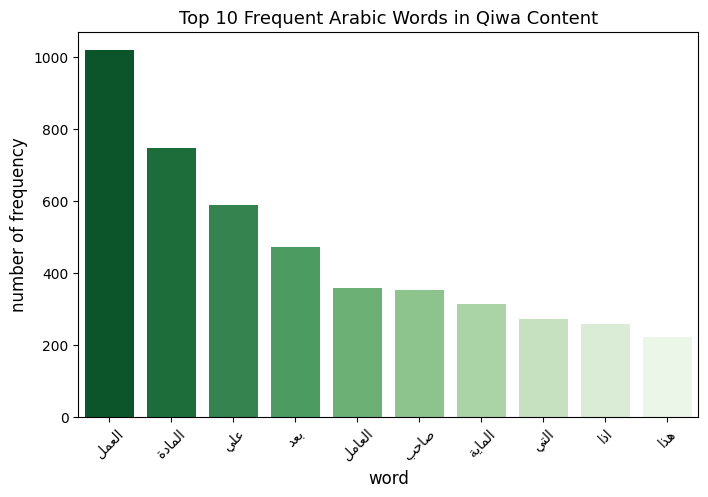

In [21]:

import arabic_reshaper
from bidi.algorithm import get_display

reshaped_words = [get_display(arabic_reshaper.reshape(w)) for w, c in top_words]
counts = [c for w, c in top_words]

plt.figure(figsize=(8,5))
sns.barplot(x=reshaped_words, y=counts, palette="Greens_r")
plt.title("Top 10 Frequent Arabic Words in Qiwa Content", fontsize=13)
plt.xlabel("word", fontsize=12)
plt.ylabel("number of frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Word Cloud

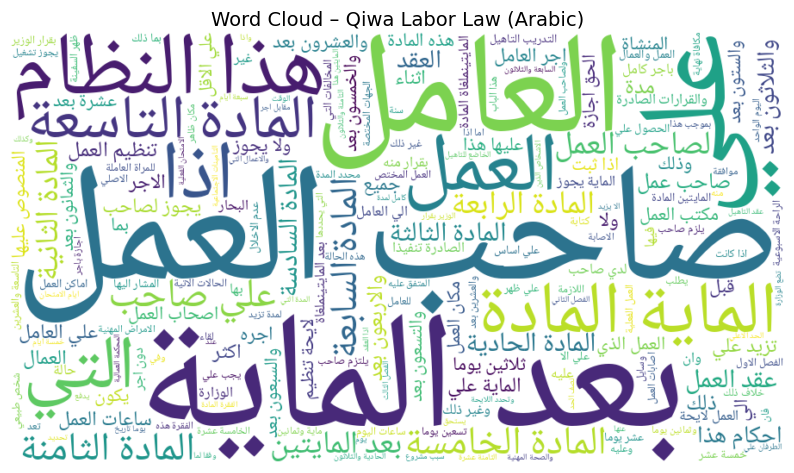

In [22]:

!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf -O /usr/share/fonts/truetype/noto.ttf


from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_combined = " ".join(tokens)
wc = WordCloud(
    width=900, height=500,
    background_color="white",
    font_path="/usr/share/fonts/truetype/noto.ttf"
).generate(text_combined)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Qiwa Labor Law (Arabic)", fontsize=14)
plt.show()


##FAQ: Questions & Answers

###Text EDA (Questions Analysis)

Basic Text Stats (Lengths)

In [23]:

faq_df["Question_length"] = faq_df["Question"].astype(str).apply(len)
faq_df["Answer_length"] = faq_df["Answer"].astype(str).apply(len)

print("Average question length:", round(faq_df["Question_length"].mean(), 2))
print("Average answer length:", round(faq_df["Answer_length"].mean(), 2))

print("\nTop 3 longest questions:")
print(faq_df.sort_values("Question_length", ascending=False).head(3)[["Question"]])


Average question length: 67.5
Average answer length: 178.25

Top 3 longest questions:
                                             Question
13  هل يحق للمؤسسة أو الشركة في حالة تجديد رخصة ال...
5   إذا كان الموظف في فترة التجربة وقرر عدم الاستم...
4   هل يحق للموظف الحصول على مبلغ نقدي كتعويض عن ر...


“The average FAQ question contained 68 characters, while answers averaged 178 characters, showing that responses are much more detailed than inquiries.”

 Distribution of Question Lengths:

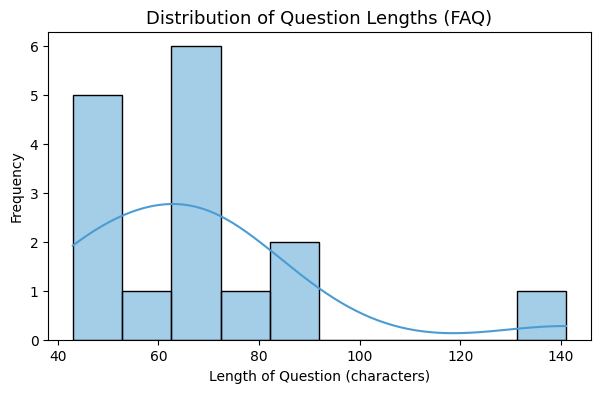

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.histplot(faq_df["Question_length"], bins=10, kde=True, color="#4B9CD3")
plt.title("Distribution of Question Lengths (FAQ)", fontsize=13)
plt.xlabel("Length of Question (characters)")
plt.ylabel("Frequency")
plt.show()


Top Frequent Words :

In [25]:



stopwords = [
    "من", "على", "عن", "أن", "في", "إلى", "هل", "هو", "هي", "هذا", "ذلك",
    "الذي", "التي", "الى", "تم", "قد", "كما", "ما", "لم", "لا", "إذا", "بها", "به"
]

def tokenize_arabic_clean(text):
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    words = text.split()
    words = [w for w in words if len(w) > 2 and w not in stopwords]
    return words


all_words_clean = []
for q in faq_df["Question"]:
    all_words_clean.extend(tokenize_arabic_clean(str(q)))

word_freq_clean = Counter(all_words_clean)
top_words_clean = word_freq_clean.most_common(10)

print("\nTop 10 most meaningful words:")
for w, c in top_words_clean:
    print(f"{w}: {c}")



Top 10 most meaningful words:
العمل: 7
يجب: 4
عقد: 4
يحق: 4
الموظف: 3
غير: 3
يكون: 2
منشأة: 2
عليها: 2
صاحب: 2


The most frequent meaningful words were “العمل”, “يجب”, and “يجوز”, indicating that most FAQ entries focus on labor law obligations, permissions, and employee rights.

Visualization (Top 10 Frequent Words bar chart):

/tmp/ipython-input-3885394586.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reshaped_words, y=counts, palette="Blues_r")
/tmp/ipython-input-3885394586.py:40: UserWarning: Glyph 108 (l) missing from font(s) Noto Naskh Arabic.
  plt.tight_layout()
/tmp/ipython-input-3885394586.py:40: UserWarning: Glyph 112 (p) missing from font(s) Noto Naskh Arabic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Naskh Arabic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Naskh Arabic.
  fig.canvas.print_figure(bytes_io, **kw)


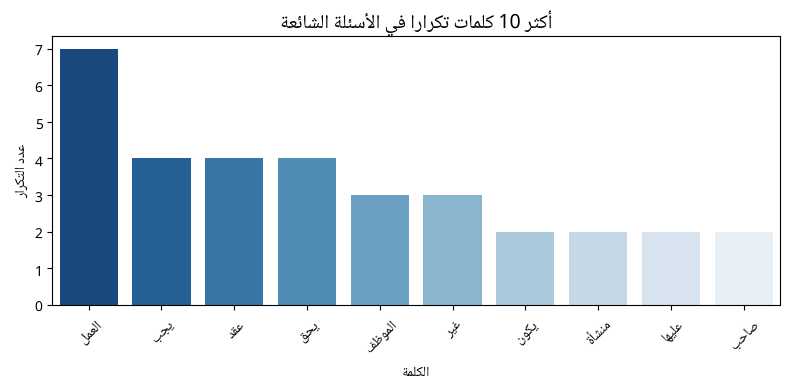

In [26]:

!pip install arabic-reshaper python-bidi --quiet


!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf -O /usr/share/fonts/truetype/NotoNaskhArabic-Regular.ttf


!fc-cache -fv > /dev/null


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud

# مسار الخط الذي حمّلناه
font_path = "/usr/share/fonts/truetype/NotoNaskhArabic-Regular.ttf"


prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = prop.get_name()


reshaped_words = [ get_display(arabic_reshaper.reshape(w)) for w, c in top_words_clean ]
counts         = [ c for w, c in top_words_clean ]

plt.figure(figsize=(8, 4))
sns.barplot(x=reshaped_words, y=counts, palette="Blues_r")

plt.title(get_display(arabic_reshaper.reshape("أكثر 10 كلمات تكرارًا في الأسئلة الشائعة")),
          fontproperties=prop, fontsize=14)
plt.xlabel(get_display(arabic_reshaper.reshape("الكلمة")), fontproperties=prop)
plt.ylabel(get_display(arabic_reshaper.reshape("عدد التكرار")), fontproperties=prop)

plt.xticks(rotation=45, fontproperties=prop)
plt.yticks(fontproperties=prop)
plt.tight_layout()
plt.show()


The most frequent words such as “العمل” (work), “يجب” (must), and “يجوز” (allowed) highlight that most FAQs revolve around legal duties and permissions under Saudi labor law. Questions often concern employment contracts and the responsibilities of both employees and employers.

WordCloud:

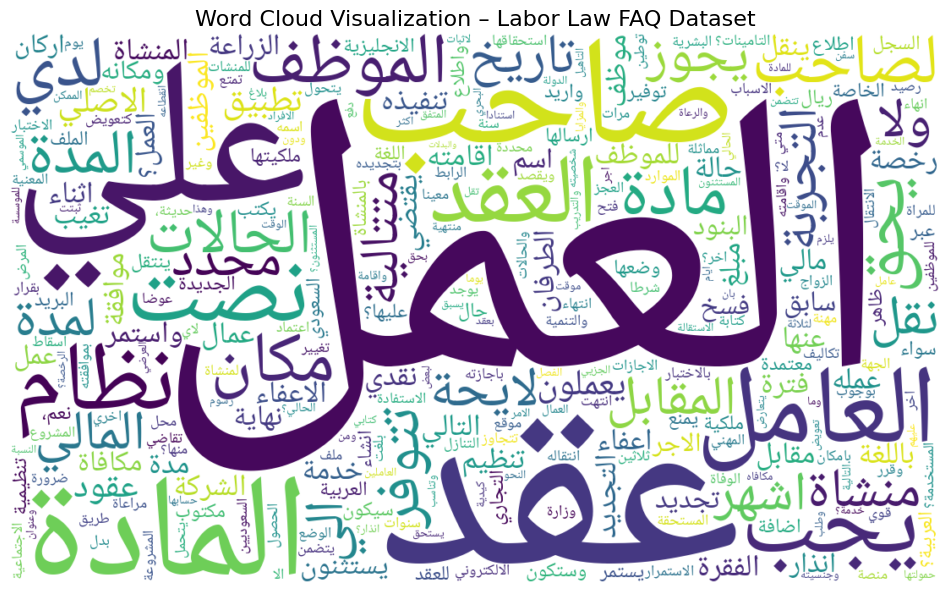

In [27]:
!apt-get -y install fonts-dejavu-core fonts-dejavu-extra > /dev/null
!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf -O /usr/share/fonts/truetype/noto.ttf

import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def normalize_ar(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'[ى]', 'ي', text)
    text = re.sub(r'[ؤ]', 'و', text)
    text = re.sub(r'[ئ]', 'ي', text)
    return text

stopwords = set("""
من في على عن الى إلى أن إن أو و ثم كما لكن لأن لذا لذلك لدى عند عليه عليها لهم لها له تم يتم يكون كانت يمكن قد لقد دون بدون مع حيث الذي التي الذين هذا هذه ذلك تلك هناك هنا اذا إذا ما ماذا هل لم لا نعم كلا كل كان ليس ليست حسب بحسب ضد قبل بعد غير فوق تحت بين خلال بسبب نحو أي كافة
""".split())

text_all = " ".join(faq_df["Question"].astype(str) + " " + faq_df["Answer"].astype(str))
text_all = normalize_ar(text_all)

tokens = [w for w in re.findall(r'[\u0600-\u06FF]+', text_all) if len(w) > 2 and w not in stopwords]
clean_text = " ".join(tokens)


wc = WordCloud(
    width=1100, height=650,
    background_color="white",
    font_path="/usr/share/fonts/truetype/noto.ttf",
    collocations=False,
    regexp=r"[\u0600-\u06FF]+",
    max_words=300
).generate(clean_text)

plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Visualization – Labor Law FAQ Dataset", fontsize=16)
plt.show()


N-gram Analysis Bigrams & Trigram:

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


def clean_arabic(text):
    text = re.sub(r'[^\u0600-\u06FF\s]', '', str(text))
    return text

faq_clean = faq_df["Question"].apply(clean_arabic)

vectorizer_2 = CountVectorizer(ngram_range=(2,2), analyzer='word')
vectorizer_3 = CountVectorizer(ngram_range=(3,3), analyzer='word')

bigrams = vectorizer_2.fit_transform(faq_clean)
trigrams = vectorizer_3.fit_transform(faq_clean)


bigram_freq = pd.DataFrame({
    'Bigram': vectorizer_2.get_feature_names_out(),
    'Count': bigrams.toarray().sum(axis=0)
}).sort_values('Count', ascending=False).head(10)

trigram_freq = pd.DataFrame({
    'Trigram': vectorizer_3.get_feature_names_out(),
    'Count': trigrams.toarray().sum(axis=0)
}).sort_values('Count', ascending=False).head(10)

print(" Top 10 Bigrams:")
print(bigram_freq)
print("\n Top 10 Trigrams:")
print(trigram_freq)


 Top 10 Bigrams:
          Bigram  Count
136       هل يحق      4
73     عقد العمل      3
154       يجب أن      3
107        ما هي      3
2       أن تتوفر      2
23      التي يجب      2
100  لصاحب العمل      2
70    صاحب العمل      2
54      تتوفر في      2
92        في عقد      2

 Top 10 Trigrams:
             Trigram  Count
1        أن تتوفر في      2
22       التي يجب أن      2
149     يجب أن تتوفر      2
86      في عقد العمل      2
130     هل يحق لصاحب      2
152  يحق لصاحب العمل      2
50      تتوفر في عقد      2
3       أن ينقل موظف      1
0    أخرى دون موافقة      1
9       إلى غير محدد      1


Bigrams (2-word phrases):

“هل يحق” (4×) – most common opener → users ask about legal entitlement.

“عقد العمل” (3×) – contract-related questions are central.

Phrases like “يحق أن”, “ما هي”, “صاحب العمل” (≈2–3×) show clarifying/legal responsibility themes.

Trigrams (3-word phrases):

“هل يحق لصاحب”, “يحق لصاحب العمل” (≈2×) – focus on employer’s rights.

Contextual legal phrasing like “أن تقرر في”, “تقرر في عقد” appears in regulatory explanations.

Interpretation:
FAQ questions are dominated by entitlement/permission language (e.g., is it allowed / is someone entitled?), with a strong concentration on employment contracts and employer–employee responsibilities

##Text EDA (Answers Analysis)

Basic Stats (Answers)

In [29]:



faq_df["Answer_length"] = faq_df["Answer"].astype(str).apply(len)


print("Average answer length:", round(faq_df["Answer_length"].mean(), 2))
print("Median answer length:", round(faq_df["Answer_length"].median(), 2))


print("\nTop 3 longest answers:")
top3_answers = faq_df.sort_values("Answer_length", ascending=False).head(3)
for i, row in enumerate(top3_answers["Answer"], 1):
    print(f"\n{i}.", str(row)[:200], "...")


Average answer length: 178.25
Median answer length: 173.0

Top 3 longest answers:

1. أثناء التجربة حسب ما نصت عليه المادة 53 الحالات حسب ما نصت عليه المادة 74 الحالات حسب ما نصت عليه المادة 80 الحالات حسب ما نصت عليه المادة 81 للمرأة 6 أشهر من الزواج أو 3 أشهر من الوضع مادة 87 المرض م ...

2. نعـم على صاحب العمل إطلاع الموظفين على لائحة تنظيم العمل الخاصة بالمنشأة سواء وضعها في مكان ظاهـر أو إرسالها عبر البريد الإلكتروني أو عـن طريـق موقـع الشـركة كما بإمكان صاحب العمل الاستفادة من خدمة اع ...

3. عقود العمل التي لا تتضمن مكافأة نهاية الخدمة هي: عقد العمل لبعض الوقت (الجزئي ) عقد العمل المؤقت عقد العمل الموسمي عقد العمل العرضي عقود العمل البحري الذين يعملون في سفن تقل حمولتها عن 500 طن عقود الت ...


Average answer length: 178.25 characters
→ Most answers are short and concise, focusing on explaining a single rule or case.

Median answer length: 173 characters
→ The similarity between average and median indicates consistent answer lengths, with no major outliers.

Top 3 longest answers:
These belong to more detailed legal topics — such as probation periods, reporting obligations, and special contract types — which naturally require longer explanations.

💡 Interpretation:
FAQ answers are generally brief and standardized, written to provide quick, clear responses. Only a few, like legal clarifications, are longer because they include article numbers or procedural steps

Histogram of Answer Lengths

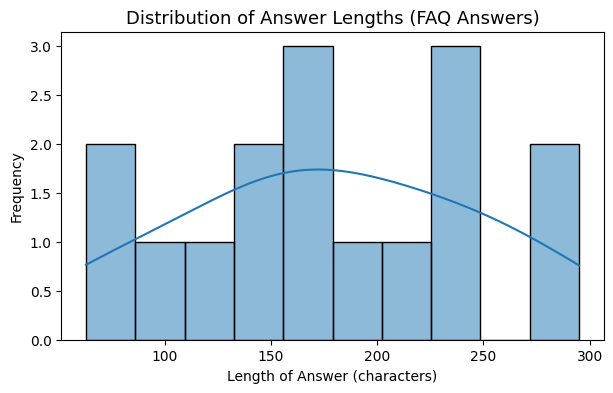

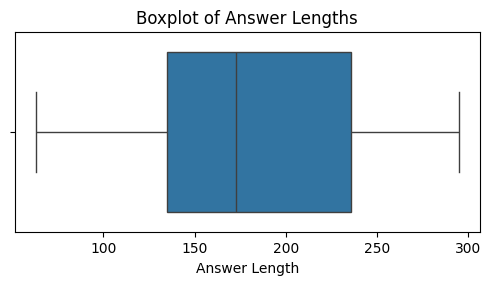

In [30]:


plt.figure(figsize=(7,4))
sns.histplot(faq_df["Answer_length"], bins=10, kde=True)
plt.title("Distribution of Answer Lengths (FAQ Answers)", fontsize=13)
plt.xlabel("Length of Answer (characters)")
plt.ylabel("Frequency")
plt.show()

# Boxplot to spot outliers (optional but useful)
plt.figure(figsize=(6,2.6))
sns.boxplot(x=faq_df["Answer_length"])
plt.title("Boxplot of Answer Lengths", fontsize=12)
plt.xlabel("Answer Length")
plt.show()


The histogram shows that most answers fall between 120–250 characters, with no major outliers.
This indicates that the responses are consistent in length — most answers are concise and standardized.
The boxplot supports this: there are no extreme values, meaning the answers maintain a uniform format.

Histogram of Answer Lengths

In [31]:

tokens = []
for a in faq_df["Answer"].astype(str):
    clean = normalize_ar(a)
    words = [w for w in clean.split() if len(w) > 2 and w not in stopwords]
    tokens.extend(words)

freq = Counter(tokens)
top_clean = freq.most_common(10)

print("Top 10 Frequent Words in Answers (After Cleaning):")
for w, c in top_clean:
    print(f"{w}: {c}")


Top 10 Frequent Words in Answers (After Cleaning):
العمل: 28
المادة: 8
عقد: 8
علي: 7
صاحب: 7
العامل: 7
نصت: 5
نظام: 5
الحالات: 4
العقد: 4


Visualization of Most Frequent Words in Answers

/tmp/ipython-input-10332301.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reshaped_words, y=counts, palette='Greens_r')


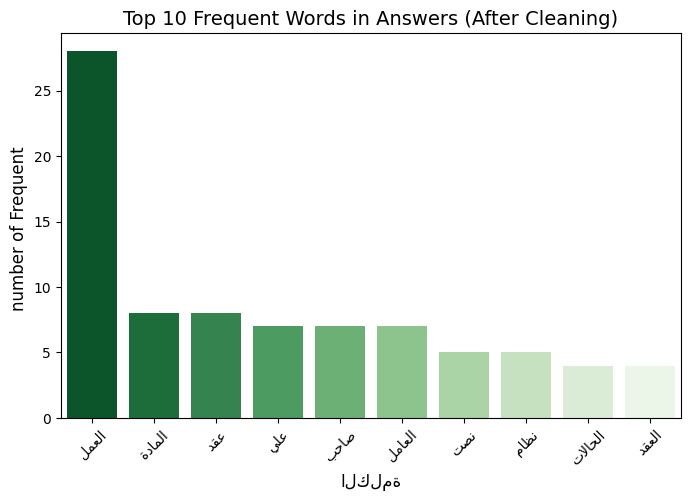

In [32]:
!pip install arabic-reshaper python-bidi > /dev/null

import arabic_reshaper
from bidi.algorithm import get_display


reshaped_words = [get_display(arabic_reshaper.reshape(w)) for w, _ in top_clean]
counts = [c for _, c in top_clean]

plt.figure(figsize=(8,5))
sns.barplot(x=reshaped_words, y=counts, palette='Greens_r')
plt.title("Top 10 Frequent Words in Answers (After Cleaning)", fontsize=14)
plt.xlabel("الكلمة", fontsize=12)
plt.ylabel("number of Frequent ", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Word Cloud for Answers

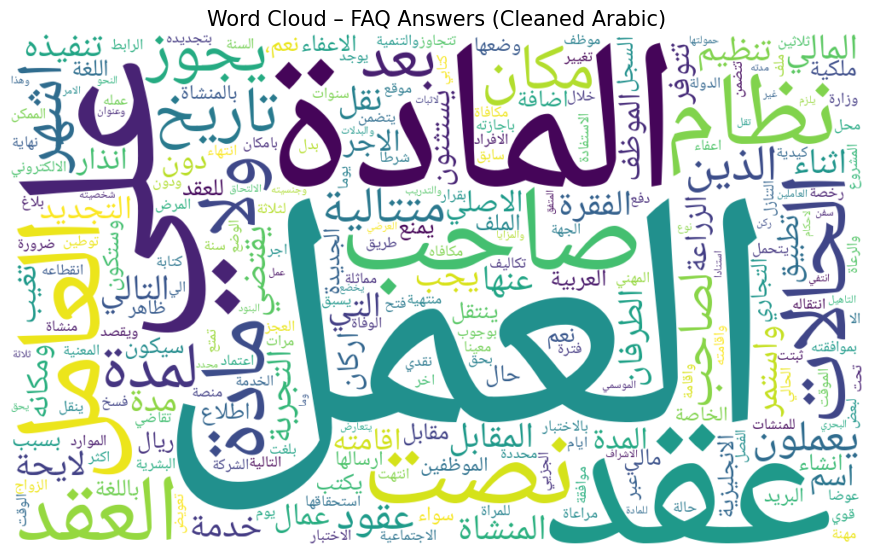

In [33]:

!apt-get -y install fonts-dejavu-core fonts-dejavu-extra > /dev/null
!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf -O /usr/share/fonts/truetype/noto.ttf

import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def normalize_ar(text: str) -> str:
    text = str(text)
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'[ى]', 'ي', text)
    text = re.sub(r'[ؤ]', 'و', text)
    text = re.sub(r'[ئ]', 'ي', text)
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

stopwords = {
    "من","في","على","عن","الى","إلى","أن","إن","ما","هو","هي","و","أو","ثم","كما",
    "قد","لقد","تم","يتم","كان","كانت","يكون","ليس","لا","لم","لن","هذا","هذه",
    "ذلك","تلك","هنا","هناك","حسب","بحسب","لدى","لدي","عند","عليه","عليها","له","لها",
    "او","كل","اي","اذا","الى"
}

tokens = []
for a in faq_df["Answer"].astype(str):
    clean = normalize_ar(a)
    words = [w for w in clean.split() if len(w) > 2 and w not in stopwords]
    tokens.extend(words)

freq = Counter(tokens)


wc_answers_clean = WordCloud(
    width=1000, height=600,
    background_color="white",
    font_path="/usr/share/fonts/truetype/noto.ttf",
    collocations=False,
    max_words=300
).generate_from_frequencies(freq)

plt.figure(figsize=(11,7))
plt.imshow(wc_answers_clean, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – FAQ Answers (Cleaned Arabic)", fontsize=15)
plt.show()


TF-IDF Analysis (Questions vs Answers)

In [34]:

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re


def normalize_ar(text):
    text = str(text)
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'و', text)
    text = re.sub(r'ئ', 'ي', text)
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


stopwords = {
    "من","في","على","عن","الى","إلى","إن","أن","ما","هو","هي","و","أو","ثم","كما",
    "قد","لقد","تم","يتم","كان","كانت","يكون","ليس","لا","لم","لن","هذا","هذه",
    "ذلك","تلك","هنا","هناك","حسب","بحسب","لدى","لدي","عند","عليه","عليها","له","لها",
    "او","كل","اي","اذا","الى"
}

def clean_text(t):
    t = normalize_ar(t)
    return " ".join([w for w in t.split() if len(w)>2 and w not in stopwords])

Q_texts = [clean_text(q) for q in faq_df["Question"].astype(str)]
A_texts = [clean_text(a) for a in faq_df["Answer"].astype(str)]
texts = Q_texts + A_texts
labels = np.array(["Q"]*len(Q_texts) + ["A"]*len(A_texts))


vec = TfidfVectorizer(ngram_range=(1,2), max_features=3000)
X = vec.fit_transform(texts)
terms = vec.get_feature_names_out()

Q_mean = X[labels=="Q"].mean(axis=0).A1
A_mean = X[labels=="A"].mean(axis=0).A1
delta = A_mean - Q_mean


top_A = np.argsort(delta)[-10:][::-1]
top_Q = np.argsort(delta)[:10]

print("=== Distinctive for ANSWERS ===")
for i in top_A:
    print(terms[i], round(delta[i],4))

print("\n=== Distinctive for QUESTIONS ===")
for i in top_Q:
    print(terms[i], round(delta[i],4))


=== Distinctive for ANSWERS ===
المادة 0.0563
العامل 0.0402
نصت 0.0386
العمل 0.036
نظام 0.0282
نظام العمل 0.0282
ولا 0.0279
بعد 0.0255
نصت المادة 0.0242
الحالات 0.0242

=== Distinctive for QUESTIONS ===
التي يجب -0.0438
يجب -0.0403
يجب تتوفر -0.0338
التي -0.0327
تتوفر عقد -0.0313
المستثنون -0.0309
غير -0.0299
يحق -0.0287
يمكن -0.0284
للموظف -0.0265


The TF-IDF analysis clearly shows a distinction between the nature of questions and answers:

Answers are dominated by legal terms such as “article,” “stated,” “labor law,” reflecting direct quotations from official legal texts.

Questions, on the other hand, include words like “is it allowed,” “must,” “available,” “documents,” “employee,” indicating a human, inquiry-based tone.

 Conclusion:
Questions tend to be inquisitive and user-oriented, while answers are formal and law-driven, confirming that the dataset is well-suited for developing a legal Q&A model or for use in LLM fine-tuning.

### Secondary Dataset — Labor Law FAQ

##  EDA Summary
This dataset contains common questions and answers about labor law.
Question and answer lengths were analyzed, and frequent Arabic terms were extracted to identify popular topics.
Visualizations included histograms, bar charts, and a word cloud to show common terms.
Optional TF-IDF analysis highlighted distinctive words between questions and answers.


## Metadata Review
The dataset was collected from the **FAQ section** on the official **Qiwa.sa** website,
representing public inquiries about the Saudi Labor Law.


##  Bias Awareness
The questions reflect user curiosity and confusion rather than the full scope of the law,
so the data may emphasize topics the public struggles with most.



##Comparison: Basic metrics (FAQ vs Qiwa)

In [35]:
import pandas as pd
import numpy as np
import re
from collections import Counter


def normalize_ar(text):
    text = str(text)
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'و', text)
    text = re.sub(r'ئ', 'ي', text)
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

stopwords = {"من","في","على","عن","الى","إلى","إن","أن","ما","هو","هي","و","أو",
             "ثم","كما","قد","لقد","تم","يتم","كان","كانت","يكون","ليس","لا",
             "لم","لن","هذا","هذه","ذلك","تلك","هنا","هناك","حسب","بحسب",
             "لدى","لدي","عند","عليه","عليها","له","لها","او","كل","اي","اذا"}

def tokenize_clean(series):
    toks = []
    for s in series.astype(str):
        s = normalize_ar(s)
        toks += [w for w in s.split() if len(w) > 2 and w not in stopwords]
    return toks


def ensure_content_length(df):


    for cand in ['Content_length', 'content_length', 'Content_len', 'content_len']:
        if cand in df.columns:
            s = pd.to_numeric(df[cand], errors='coerce')

            if s.isna().mean() < 0.9:
                return s.fillna(0)


    for text_col in ['Content', 'content', 'Text', 'text', 'ArticleText', 'Article', 'المحتوى', 'النص']:
        if text_col in df.columns:
            return df[text_col].astype(str).str.len()


    obj_cols = [c for c in df.columns if df[c].dtype == 'object']
    if obj_cols:
        lens = {c: df[c].astype(str).str.len().mean() for c in obj_cols}
        best = max(lens, key=lens.get)
        return df[best].astype(str).str.len()


    return pd.Series([0]*len(df), index=df.index)

faq_q_len  = faq_df["Question"].astype(str).apply(len)
faq_a_len  = faq_df["Answer"].astype(str).apply(len)
faq_all_len = pd.concat([faq_q_len, faq_a_len], ignore_index=True)

qiwa_len = ensure_content_length(qiwa_df)

metrics = pd.DataFrame({
    "dataset": ["FAQ (Q+A)", "Qiwa (Articles)"],
    "rows":    [len(faq_df)*2, len(qiwa_df)],
    "avg_len": [round(faq_all_len.mean(), 2), round(qiwa_len.mean(), 2)],
    "median":  [round(faq_all_len.median(), 2), round(qiwa_len.median(), 2)]
})
metrics


,dataset,rows,avg_len,median
0,FAQ (Q+A),32,122.88,87.0
1,Qiwa (Articles),16,12262.50,8771.5


In [36]:

print("Qiwa columns:", list(qiwa_df.columns))


def pick_text_col(df, candidates=None):
    if candidates is None:
        candidates = [
            'Content','content','Text','text','ArticleText','Article','Body','body',
            'المحتوى','النص'
        ]

    for c in candidates:
        if c in df.columns:
            return df[c].astype(str)

    obj_cols = [c for c in df.columns if df[c].dtype == 'object']
    if obj_cols:
        avg_lens = {c: df[c].astype(str).str.len().mean() for c in obj_cols}
        best = max(avg_lens, key=avg_lens.get)
        print(f"[info] Using '{best}' as content column (auto-picked).")
        return df[best].astype(str)

    return pd.Series(['']*len(df), index=df.index)


faq_text   = pd.concat([faq_df["Question"], faq_df["Answer"]], ignore_index=True).astype(str)
qiwa_text  = pick_text_col(qiwa_df)

faq_tokens  = tokenize_clean(faq_text)
qiwa_tokens = tokenize_clean(qiwa_text)

vocab_faq  = set(faq_tokens)
vocab_qiwa = set(qiwa_tokens)
jaccard = len(vocab_faq & vocab_qiwa) / max(1, len(vocab_faq | vocab_qiwa))
print(f"Jaccard vocabulary overlap (FAQ vs Qiwa): {jaccard:.3f}")


from collections import Counter
faq_top  = Counter(faq_tokens).most_common(15)
qiwa_top = Counter(qiwa_tokens).most_common(15)

print("\nTop 15 words — FAQ:")
for w,c in faq_top: print(f"{w}: {c}")

print("\nTop 15 words — Qiwa:")
for w,c in qiwa_top: print(f"{w}: {c}")


faq_unique  = [w for w,_ in faq_top  if w not in vocab_qiwa]
qiwa_unique = [w for w,_ in qiwa_top if w not in vocab_faq]

print("\nDistinctive in FAQ (not in Qiwa top):", ", ".join(faq_unique[:8]))
print("Distinctive in Qiwa (not in FAQ top):", ", ".join(qiwa_unique[:8]))


Qiwa columns: ['url', 'content', 'content_length']
Jaccard vocabulary overlap (FAQ vs Qiwa): 0.060

Top 15 words — FAQ:
العمل: 35
عقد: 12
علي: 11
صاحب: 9
العامل: 8
المادة: 8
يجب: 6
العقد: 6
نظام: 6
نصت: 6
الموظف: 5
يحق: 5
مادة: 5
التي: 5
لصاحب: 5

Top 15 words — Qiwa:
العمل: 946
المادة: 738
علي: 587
بعد: 470
صاحب: 353
العامل: 350
الماية: 318
التي: 272
الي: 171
النظام: 140
يجوز: 135
غير: 124
العقد: 113
العمال: 112
الذي: 105

Distinctive in FAQ (not in Qiwa top): الموظف
Distinctive in Qiwa (not in FAQ top): الماية, النظام, الذي


Final Comparative Analysi

In [37]:
import pandas as pd, numpy as np, re
from collections import Counter

try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    def fix_ar(s):
        try: return get_display(arabic_reshaper.reshape(str(s)))
        except: return s
except:
    def fix_ar(s): return s

def ensure_df(var_name, fallback_csv):
    g = globals()
    if var_name in g and isinstance(g[var_name], pd.DataFrame):
        return g[var_name]
    try:
        df = pd.read_csv(fallback_csv, encoding="utf-8-sig")
        globals()[var_name] = df
        return df
    except Exception as e:
        raise RuntimeError(f"لم أجد المتغير `{var_name}` ولا الملف `{fallback_csv}`. عدّلي الاسم أو حمّلي الملف. Original: {e}")

boe      = ensure_df("boe",      "boe_cleaned.csv")
istitlaa = ensure_df("istitlaa", "istitlaa_cleaned.csv")
faq      = ensure_df("faq_df",   "labor_law_faq_cleaned.csv")


def get_article_num(text):
    if not isinstance(text, str):
        return np.nan
    m = re.search(r'\d+', text)
    if m:
        return int(m.group())
    words = {
        "الثانية":2,"الثالثة":3,"الرابعة":4,"الخامسة":5,"السادسة":6,"السابعة":7,"الثامنة":8,"التاسعة":9,
        "العاشرة":10,"الحادية عشرة":11,"الثانية عشرة":12,"الثالثة عشرة":13,"الرابعة عشرة":14,"الخامسة عشرة":15,
        "السادسة عشرة":16,"السابعة عشرة":17,"الثامنة عشرة":18,"التاسعة عشرة":19,"العشرون":20
    }
    for w,n in words.items():
        if w in text:
            return n
    return np.nan


if 'Article_num' not in boe.columns:
    boe['Article_num'] = boe['Article'].apply(get_article_num)
if 'Article_num' not in istitlaa.columns:
    istitlaa['Article_num'] = istitlaa['Article'].apply(get_article_num)


status_col = 'Status' if 'Status' in boe.columns else 'status'
boe_mod = boe.loc[boe[status_col].astype(str).str.contains("معدل|معدلة|معدّلة", regex=True), ['Article_num','Text','Section','Chapter']]
boe_mod = boe_mod.dropna(subset=['Article_num']).drop_duplicates(subset=['Article_num'])


istit = istitlaa[['Article_num','Current Text','Proposed Text','URL']].dropna(subset=['Article_num']).drop_duplicates(subset=['Article_num'])


boe_istit_merge = (boe_mod.merge(istit, on='Article_num', how='inner')
                        .sort_values('Article_num')
                  )

print("=== BOE ↔ Istitlaa (مواد مشتركة بحسب رقم المادة) ===")
print(f"عدد المواد المعدّلة في BOE: {boe_mod['Article_num'].nunique()}")
print(f"عدد مواد استطلاع:         {istit['Article_num'].nunique()}")
print(f"عدد المواد المشتركة:       {boe_istit_merge['Article_num'].nunique()}\n")
display(boe_istit_merge.head(10))



arabic_punct = r"[^\u0600-\u06FF\s]"
stopwords = set("""من إلى عن على في فيه فيها عليه عليها لديهم لديهم لدى هذا هذه ذلك تلك التي الذي الذين اللواتي هن هو هي هم هنك لكم لكم لنا كنت كان تكون تكونوا تكونين تكونان تكونون يكون تكون كنت كانوا كانت كنّ""".split())

def normalize_ar(s):
    s = re.sub(arabic_punct, " ", str(s))
    s = re.sub(r"\s+", " ", s).strip()

    s = s.replace("أ","ا").replace("إ","ا").replace("آ","ا").replace("ى","ي").replace("ؤ","و").replace("ئ","ي").replace("ة","ه")
    return s

def tokenize_clean(s):
    toks = normalize_ar(s).split()
    return [t for t in toks if len(t) > 2 and t not in stopwords]


boe_text_all = " ".join(boe_mod['Text'].astype(str).tolist())
boe_tokens   = tokenize_clean(boe_text_all)


faq_text_all = " ".join((faq.get('Question','').astype(str) + " " + faq.get('Answer','').astype(str)).tolist())
faq_tokens   = tokenize_clean(faq_text_all)


boe_freq = Counter(boe_tokens)
faq_freq = Counter(faq_tokens)


common_vocab = set(boe_freq) & set(faq_freq)
jaccard = len(common_vocab) / (len(set(boe_freq)|set(faq_freq)) + 1e-9)

boe_top = boe_freq.most_common(15)
faq_top = faq_freq.most_common(15)

print("\n=== BOE ↔ Qiwa (FAQ) — تشابه مفردات عام ===")
print(f"حجم مفردات BOE: {len(boe_freq):,} | حجم مفردات Qiwa: {len(faq_freq):,}")
print(f"تشابه Jaccard:  {jaccard:.3f}\n")

print("Top 10 in BOE:")
for w,c in boe_top[:10]:
    print(f"{w}: {c}")
print("\nTop 10 in Qiwa:")
for w,c in faq_top[:10]:
    print(f"{w}: {c}")

def distinctive(topk=15):

    scores_boe = [(w, boe_freq[w]/(faq_freq[w]+1)) for w in boe_freq]
    scores_faq = [(w, faq_freq[w]/(boe_freq[w]+1)) for w in faq_freq]
    top_boe = sorted(scores_boe, key=lambda x: x[1], reverse=True)[:topk]
    top_faq = sorted(scores_faq, key=lambda x: x[1], reverse=True)[:topk]
    return top_boe, top_faq

top_boe_dist, top_faq_dist = distinctive(12)
print("\n=== كلمات مميزة أكثر في BOE ===")
for w,s in top_boe_dist:
    print(f"{w}")

print("\n=== كلمات مميزة أكثر في Qiwa ===")
for w,s in top_faq_dist:
    print(f"{w}")


=== BOE ↔ Istitlaa (مواد مشتركة بحسب رقم المادة) ===
عدد المواد المعدّلة في BOE: 11
عدد مواد استطلاع:         13
عدد المواد المشتركة:       3



,Article_num,Text,Section,Chapter,Current Text,Proposed Text,URL
0,2.0,- تعديل تعريف العامل وذلك بموجب المرسوم الملكي...,الباب الأول التعريفات والأحكام العامة,الفصل الأول التعريفات,المادة (2) في تنفيذ أحكام الفقرة الفرعية (د) م...,حذف المادة ​,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
1,7.0,تم تعديل هذه المادة بموجب المرسوم الملكي رقم (...,الباب الأول التعريفات والأحكام العامة,الفصل الأول التعريفات,المادة (7) في تنفيذ أحكام المواد (الثانية والع...,المادة (7) في تنفيذ أحكام المواد (الثانية والع...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...
2,10.0,تم إلغاء الباب الرابع عشر بموجب المرسوم الملكي...,الباب الرابع عشر هيئات تسوية الخلافات العمالية,الفصل الأول التعريفات,المادة (10) في تنفيذ أحكام (المادة الثلاثون) م...,المادة (10) في تنفيذ أحكام (المادة الثلاثون) م...,https//istitlaa.ncc.gov.sa/ar/labor/hrsd/regul...



=== BOE ↔ Qiwa (FAQ) — تشابه مفردات عام ===
حجم مفردات BOE: 360 | حجم مفردات Qiwa: 325
تشابه Jaccard:  0.101

Top 10 in BOE:
العمل: 24
علي: 15
الماده: 12
المرسوم: 11
الملكي: 11
وتاريخ: 11
صاحب: 11
الاتي: 10
بموجب: 9
رقم: 9

Top 10 in Qiwa:
العمل: 35
عقد: 12
علي: 11
صاحب: 9
الماده: 8
العامل: 8
اذا: 8
يجب: 6
نصت: 6
نظام: 6

=== كلمات مميزة أكثر في BOE ===
المرسوم
الملكي
وتاريخ
الاتي
بموجب
رقم
تعديل
بالنص
لتكون
يعمل
عشره
هـ،

=== كلمات مميزة أكثر في Qiwa ===
نصت
الموظف
يحق
ماده
عقد
العامل
حسب
الحالات
المده
تتوفر
المقابل
المالي





# Comparison: BOE,Istitlaa, FAQ, Qiwa


The following section compares four datasets (Qiwa FAQ, Qiwa Articles, BOE Official Law, and Istitlaa Public Consultation) based on text length, topic frequency, and content structure.

Table comparison:

In [53]:
def get_top_words(df, text_col, top_n=5):
    if text_col not in df.columns:
        return "No text column"
    all_text = " ".join(df[text_col].dropna().astype(str))
    all_text = normalize_ar(all_text)
    words = [w for w in all_text.split() if len(w) > 2 and w not in stopwords]
    common = Counter(words).most_common(top_n)
    return "; ".join([f"{w} ({c})" for w, c in common])


faq_stats = {
    "Dataset": "FAQ (Q+A)",
    "Rows": len(faq_df) * 2,
    "Avg_Text_Length": round(pd.concat([
        faq_df["Question"].astype(str).apply(len),
        faq_df["Answer"].astype(str).apply(len)
    ]).mean(), 2),
    "Median_Text_Length": round(pd.concat([
        faq_df["Question"].astype(str).apply(len),
        faq_df["Answer"].astype(str).apply(len)
    ]).median(), 2),
    "Top_Words": get_top_words(faq_df, "Question")  # ممكن تستخدم Answer بعد
}

qiwa_stats = {
    "Dataset": "Qiwa (Articles)",
    "Rows": len(qiwa_df),
    "Avg_Text_Length": round(qiwa_df["content"].astype(str).apply(len).mean(), 2),
    "Median_Text_Length": round(qiwa_df["content"].astype(str).apply(len).median(), 2),
    "Top_Words": get_top_words(qiwa_df, "content")
}

boe_stats = {
    "Dataset": "BOE (Official Law)",
    "Rows": len(boe),
    "Avg_Text_Length": round(boe["Text"].astype(str).apply(len).mean(), 2),
    "Median_Text_Length": round(boe["Text"].astype(str).apply(len).median(), 2),
    "Top_Words": get_top_words(boe, "Text")
}

istitlaa_stats = {
    "Dataset": "Istitlaa (Public Consultation)",
    "Rows": len(istitlaa),
    "Avg_Text_Length": round(istitlaa["Proposed Text"].astype(str).apply(len).mean(), 2),
    "Median_Text_Length": round(istitlaa["Proposed Text"].astype(str).apply(len).median(), 2),
    "Top_Words": get_top_words(istitlaa, "Proposed Text")
}


metrics_df = pd.DataFrame([faq_stats, qiwa_stats, boe_stats, istitlaa_stats])


print("Summary Statistics Comparison with Top Words")
display(metrics_df)



Summary Statistics Comparison with Top Words


,Dataset,Rows,Avg_Text_Length,Median_Text_Length,Top_Words
0,FAQ (Q+A),32,122.88,87.0,العمل (7); يجب (4); عقد (4); علي (4); يحق (4)
1,Qiwa (Articles),16,12262.50,8771.5,العمل (946); المادة (738); علي (587); بعد (470...
2,BOE (Official Law),248,426.79,293.0,العمل (387); علي (339); بعد (292); المايتين (2...
3,Istitlaa (Public Consultation),16,522.44,300.0,التدريب (41); المادة (36); العمل (28); علي (21...


chart comparison

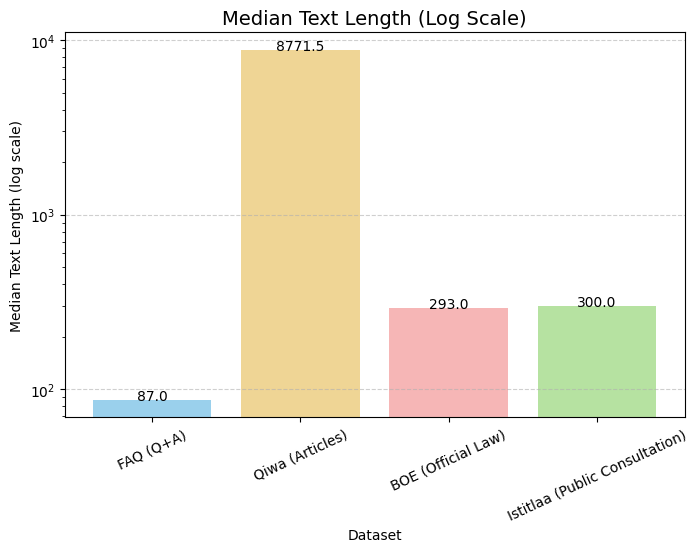

In [51]:
plt.figure(figsize=(8,5))
plt.bar(metrics_df["Dataset"], metrics_df["Median_Text_Length"],
        color=['#9AD0EC', '#EFD595', '#F6B6B6', '#B6E2A1'])
plt.yscale('log')
plt.title("Median Text Length (Log Scale)", fontsize=14)
plt.xlabel("Dataset")
plt.ylabel("Median Text Length (log scale)")
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, val in enumerate(metrics_df["Median_Text_Length"]):
    plt.text(i, val, str(round(val,1)), ha='center', fontsize=10)

plt.show()



**Interpretation of table Comparison:**


The comparison across the four datasets reveals major differences in both text length and topic focus.

Qiwa (FAQ) has 32 entries with short texts (average 122 characters), which is consistent with its Q&A structure providing direct, concise information.

Qiwa (Articles) shows extremely long texts (average 12,262 characters, median 8,771), reflecting detailed explanatory content written in full-article form.

BOE (Official Law) includes 248 entries with moderate text length (average 426 characters), as it represents segmented legislative articles.

Istitlaa (Public Consultation) contains 16 entries with medium-length proposals (average 522 characters), showing a balance between brevity and detail for public consultation.

In terms of topics, all datasets share the recurring word (work), emphasizing labor-related content.
However, Qiwa and BOE show a strong dominance of legal and procedural terms such as (article), while FAQ focuses on practical instructions and employee rights.
Istitlaa highlights consultation-oriented terms like (training) and (modification), aligning with its goal of collecting public input on legal amendments.

Overall, the results show a natural hierarchy from concise user-focused content (FAQ) to highly detailed official texts (Qiwa), reflecting the nature and purpose of each platform.


**Interpretation of chart Comparison:**

The chart shows a large difference in median text length across datasets.
Qiwa has a significantly higher median due to its full-length articles, while FAQ, BOE, and Istitlaa contain much shorter texts.
This confirms that Qiwa provides detailed explanatory content, whereas the other datasets focus on more concise, structured information.